In [1]:
%matplotlib inline

Большая часть закомментенных ячеек готовила фалй с координатами и началами гороскопов "гороскопы мейла с фичами.csv"

In [2]:
# !pip install astroquery

In [3]:
# from astropy.time import Time
# from astroquery.jplhorizons import Horizons

# https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html Общая справка по группе методов jplhorizons
# https://astroquery.readthedocs.io/en/latest/api/astroquery.jplhorizons.HorizonsClass.html Более конкретная справка по классу Horizons
# https://ssd.jpl.nasa.gov/horizons.cgi#top Оригинальный сервис, с которого тянутся данные
# Коды планет [N] для подстановки в Horizons(id=N
# [10]Sun[Sol] [199]Mercury [299]Venus [399]Earth[Geocenter] [499]Mars [599]Jupiter [699]Saturn [799]Uranus [899]Neptune [999]Pluto(134340)
# location=500 - это позиция наблюдателя центр земли, можно еще центр солнца использовать - "@sun", а так их много.

# Описание вывода (Кроме последних трех, это все координаты) для vectors()
# https://astroquery.readthedocs.io/en/latest/api/astroquery.jplhorizons.HorizonsClass.html#astroquery.jplhorizons.HorizonsClass.vectors

# obj = Horizons(id=599, location=500, epochs=Time("2020-10-21").jd, id_type='id').vectors() # ГГГГ-ММ-ДД
# obj.to_pandas()[['x',	'y',	'z',	'vx',	'vy',	'vz',	'lighttime',	'range',	'range_rate']]

In [4]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

import pandas as pd
import numpy as np

import tqdm
import matplotlib.pyplot as plt

import re

In [5]:
# file = pd.read_csv('df_three.csv', sep=';')
# file.head(3)

In [6]:
# signs = ['Овен',	'Телец',	'Близнецы',	'Рак',	'Лев',	'Дева',	'Весы',	'Скорпион',	'Стрелец',	'Козерог',	'Водолей',	'Рыбы']

# def conv_date(d):
#   d = d.split()
#   year = d[-1]
#   day = d[0]
#   if d[1] == 'января':
#     month = '01'
#   elif d[1] == 'февраля':
#     month = '02'
#   elif d[1] == 'марта':
#     month = '03'
#   elif d[1] == 'апреля':
#     month = '04'
#   elif d[1] == 'мая':
#     month = '05'
#   elif d[1] == 'июня':
#     month = '06'
#   elif d[1] == 'июля':
#     month = '07'
#   elif d[1] == 'августа':
#     month = '08'
#   elif d[1] == 'сентября':
#     month = '09'
#   elif d[1] == 'октября':
#     month = '10'
#   elif d[1] == 'ноября':
#     month = '11'
#   elif d[1] == 'декабря':
#     month = '12'

#   return '-'.join([year, month, day])

# planets = {'Sun': 10,  'Mercury': 199, 'Venus': 299, 'Mars': 499, 'Jupiter': 599, 'Saturn': 699, 'Uranus': 799, 'Neptune': 899, 'Pluto': 999}

# df = file[['date'] + signs].copy()
# df.fillna('0')
# df['date'] =  df['date'].apply(lambda x: conv_date(x))
# df['date_for_epoch'] =  df['date'].apply(lambda x: Time(x).jd)

# for sign in signs:
#   df['start_' + sign] = df[sign].apply(lambda x: ' '.join(re.sub(r'[^\w\s]','',x).split()[0:2]).lower() if type(x) == str else x)
# df = df.drop(signs, axis=1)

# features = []

# for k, v in planets.items():
#   df[[k+'_x', k+'_y', k+'_z', k+'_vx', k+'_vy', k+'_vz', k+'_l', k+'_ry', k+'_rr']] = ['', '', '', '', '', '', '', '', '']
#   features += [k+'_x', k+'_y', k+'_z', k+'_vx', k+'_vy', k+'_vz', k+'_l', k+'_ry', k+'_rr']

# for k, v in tqdm.notebook.tqdm(planets.items()):
#   for i in tqdm.notebook.tqdm(range(len(df))):
#     df.loc[i, [k+'_x', k+'_y', k+'_z', k+'_vx', k+'_vy', k+'_vz', k+'_l', k+'_ry', k+'_rr']] = Horizons(id=v, location=500, epochs=df.loc[i, 'date_for_epoch'], id_type='id').vectors().to_pandas()[['x',	'y',	'z',	'vx',	'vy',	'vz',	'lighttime',	'range',	'range_rate']].values[0]

# df.head(3)

In [7]:
# df.tail(3)

In [8]:
# df.to_csv('гороскопы мейла с фичами.csv', sep=';')

# Загружаем файл и готовим некоторые списки


df = pd.read_csv('гороскопы мейла с фичами.csv', sep=';')

signs = ['Овен',	'Телец',	'Близнецы',	'Рак',	'Лев',	'Дева',	'Весы',	'Скорпион',	'Стрелец',	'Козерог',	'Водолей',	'Рыбы']
planets = {'Sun': 10,  'Mercury': 199, 'Venus': 299, 'Mars': 499, 'Jupiter': 599, 'Saturn': 699, 'Uranus': 799, 'Neptune': 899, 'Pluto': 999}
features = []
for k, v in planets.items():
  features += [k+'_x', k+'_y', k+'_z', k+'_vx', k+'_vy', k+'_vz', k+'_l', k+'_ry', k+'_rr']

In [9]:
# !pip install navec
# !pip install slovnet
# !wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

In [10]:
# from navec import Navec
# from slovnet.model.emb import NavecEmbedding

# navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')
# words = ['навек', 'дом', 'дерево', '<unk>', '<pad>']
# ids = [navec.vocab[_] for _ in words]
# emb = NavecEmbedding(navec)
# input = torch.tensor(ids)
# tens = emb(input)
# tens.shape

In [11]:
df = df.drop(['date',	'date_for_epoch'], axis=1)

In [12]:
# Загруженный файл переводим из горизонтального вида в вертикальный, чтобы все знаки зодиака шли одним столбцом start (первые 2 слова прогноза)
# Класс знака зодиака задается в столбце cls
# Все прочие столбцы - это координаты планет.

cls = np.linspace(0, 1, 12)
data = df[['start_Овен'] + features].copy()
data['cls'] = cls[0]
data = data.rename(columns={'start_Овен': 'start'})
for i, sign in enumerate(signs):
  if sign != 'Овен':
    data_part = df[['start_' + sign] + features].copy()
    data_part['cls'] = cls[i]
    data_part = data_part.rename(columns={'start_' + sign: 'start'})
    data = pd.concat([data, data_part], ignore_index=True)
data[3000:3010]

,start,Sun_x,Sun_y,Sun_z,Sun_vx,Sun_vy,Sun_vz,Sun_l,Sun_ry,Sun_rr,Mercury_x,Mercury_y,Mercury_z,Mercury_vx,Mercury_vy,Mercury_vz,Mercury_l,Mercury_ry,Mercury_rr,Venus_x,Venus_y,Venus_z,Venus_vx,Venus_vy,Venus_vz,Venus_l,Venus_ry,Venus_rr,Mars_x,Mars_y,Mars_z,Mars_vx,Mars_vy,Mars_vz,Mars_l,Mars_ry,Mars_rr,Jupiter_x,Jupiter_y,Jupiter_z,...,Jupiter_l,Jupiter_ry,Jupiter_rr,Saturn_x,Saturn_y,Saturn_z,Saturn_vx,Saturn_vy,Saturn_vz,Saturn_l,Saturn_ry,Saturn_rr,Uranus_x,Uranus_y,Uranus_z,Uranus_vx,Uranus_vy,Uranus_vz,Uranus_l,Uranus_ry,Uranus_rr,Neptune_x,Neptune_y,Neptune_z,Neptune_vx,Neptune_vy,Neptune_vz,Neptune_l,Neptune_ry,Neptune_rr,Pluto_x,Pluto_y,Pluto_z,Pluto_vx,Pluto_vy,Pluto_vz,Pluto_l,Pluto_ry,Pluto_rr,cls
3000,вас ждет,0.951234,-0.279914,0.000010,0.005131,0.016569,-1.452601e-07,0.005727,0.991564,0.000245,0.558345,-0.322015,0.032611,0.002276,-0.010196,-0.001925,0.003727,0.645373,0.006960,0.761637,0.413274,0.020463,-0.014447,0.011121,0.001055,0.005006,0.866778,-0.007367,0.325520,-1.656128,-0.013475,0.018398,0.011979,-0.000422,0.009748,1.687870,-0.008202,1.942299,-5.389201,-0.000943,...,0.033085,5.728526,-0.013054,5.052588,-9.430518,-0.004147,0.009921,0.018838,-0.000230,0.061791,10.698754,-0.011919,17.031853,11.289664,-0.165301,0.002812,0.019580,0.000041,0.118020,20.434477,0.013161,30.234647,-6.452398,-0.547834,0.005766,0.019662,-0.000079,0.178581,30.920340,0.001536,14.115515,-31.615970,-0.454314,0.008095,0.017113,-0.000908,0.199988,34.626922,-0.012313,0.818182
3001,благоприятный день,0.945959,-0.296441,0.000010,0.005419,0.016483,-1.784776e-07,0.005725,0.991320,0.000242,0.556867,-0.311697,0.034457,0.000668,-0.010421,-0.001763,0.003691,0.639096,0.005569,0.776012,0.401919,0.019400,-0.014302,0.011589,0.001071,0.005049,0.874134,-0.007344,0.307005,-1.668006,-0.013053,0.018632,0.011775,-0.000423,0.009796,1.696073,-0.008205,1.929697,-5.407517,-0.000771,...,0.033160,5.741513,-0.012921,5.042522,-9.449311,-0.003916,0.010211,0.018749,-0.000230,0.061859,10.710580,-0.011734,17.028897,11.270126,-0.165342,0.003101,0.019495,0.000041,0.117943,20.421224,0.013344,30.228737,-6.472018,-0.547755,0.006054,0.019577,-0.000078,0.178571,30.918661,0.001823,14.107276,-31.633037,-0.453401,0.008385,0.017021,-0.000920,0.200059,34.639137,-0.012117,0.818182
3002,преобладает влияние,0.940396,-0.312879,0.000010,0.005706,0.016392,-2.392758e-07,0.005724,0.991079,0.000240,0.557029,-0.301215,0.036131,-0.001001,-0.010521,-0.001584,0.003663,0.634285,0.004027,0.790235,0.390097,0.018321,-0.014142,0.012056,0.001086,0.005091,0.881466,-0.007320,0.288257,-1.679678,-0.012629,0.018864,0.011568,-0.000424,0.009843,1.704279,-0.008207,1.916807,-5.425734,-0.000600,...,0.033234,5.754367,-0.012786,5.032167,-9.468014,-0.003686,0.010500,0.018655,-0.000230,0.061926,10.722220,-0.011545,17.025652,11.250676,-0.165383,0.003389,0.019404,0.000041,0.117866,20.407790,0.013524,30.222539,-6.491549,-0.547677,0.006341,0.019485,-0.000078,0.178560,30.916695,0.002109,14.098743,-31.650015,-0.452475,0.008681,0.016934,-0.000929,0.200128,34.651157,-0.011923,0.818182
3003,все хорошо,0.928412,-0.345469,0.000011,0.006277,0.016194,-4.245605e-07,0.005721,0.990604,0.000235,0.562495,-0.280298,0.038904,-0.004496,-0.010297,-0.001177,0.003637,0.629667,0.000495,0.818166,0.365057,0.016122,-0.013779,0.012983,0.001113,0.005175,0.896059,-0.007272,0.250070,-1.702386,-0.011779,0.019321,0.011138,-0.000426,0.009938,1.720695,-0.008209,1.890161,-5.461850,-0.000256,...,0.033381,5.779664,-0.012508,5.010594,-9.505123,-0.003225,0.011072,0.018451,-0.000230,0.062058,10.744926,-0.011159,17.018302,11.212062,-0.165464,0.003960,0.019207,0.000041,0.117707,20.380390,0.013873,30.209285,-6.530325,-0.547520,0.006912,0.019287,-0.000079,0.178532,30.911905,0.002682,14.080795,-31.683707,-0.450624,0.009261,0.016753,-0.000916,0.200264,34.674618,-0.011535,0.818182
3004,все складывается,0.921993,-0.361610,0.000011,0.006560,0.016087,-5.393960e-07,0.005720,0.990370,0.000233,0.567892,-0.270161,0.039968,-0.006303,-0.009949,-0.000948,0.003639,0.63014

In [13]:
data = data.dropna()

In [14]:
data['start_char'] = data.start.apply(lambda x: x[0])

In [15]:
# Строим словари для слов из входных пар слов

# вариант с отдельными словами
from nltk.probability import FreqDist
fdist = FreqDist(' '.join(data.start_char.values).split())
freq_sort_dict = {}
inv_freq_sort_dict = {}
i = 1
for (k, v) in fdist.most_common():
  freq_sort_dict[k] = i
  inv_freq_sort_dict[i] = k
  i += 1

In [16]:
len(freq_sort_dict)

22

In [17]:
# Переводим входные слова в числа согласно словарю

data['start_char_num'] = data['start_char'].apply(lambda x: freq_sort_dict[x])
data.head(3)

,start,Sun_x,Sun_y,Sun_z,Sun_vx,Sun_vy,Sun_vz,Sun_l,Sun_ry,Sun_rr,Mercury_x,Mercury_y,Mercury_z,Mercury_vx,Mercury_vy,Mercury_vz,Mercury_l,Mercury_ry,Mercury_rr,Venus_x,Venus_y,Venus_z,Venus_vx,Venus_vy,Venus_vz,Venus_l,Venus_ry,Venus_rr,Mars_x,Mars_y,Mars_z,Mars_vx,Mars_vy,Mars_vz,Mars_l,Mars_ry,Mars_rr,Jupiter_x,Jupiter_y,Jupiter_z,...,Jupiter_rr,Saturn_x,Saturn_y,Saturn_z,Saturn_vx,Saturn_vy,Saturn_vz,Saturn_l,Saturn_ry,Saturn_rr,Uranus_x,Uranus_y,Uranus_z,Uranus_vx,Uranus_vy,Uranus_vz,Uranus_l,Uranus_ry,Uranus_rr,Neptune_x,Neptune_y,Neptune_z,Neptune_vx,Neptune_vy,Neptune_vz,Neptune_l,Neptune_ry,Neptune_rr,Pluto_x,Pluto_y,Pluto_z,Pluto_vx,Pluto_vy,Pluto_vz,Pluto_l,Pluto_ry,Pluto_rr,cls,start_char,start_char_num
0,насыщенный интересный,-0.904546,-0.417749,0.000024,0.007499,-0.015560,1.876724e-07,0.005754,0.996353,-0.000283,-0.545200,-0.462993,-0.036637,0.005571,0.013612,0.002561,0.004136,0.716204,-0.013171,-1.157731,0.254497,0.023859,-0.011498,-0.022803,0.000997,0.006848,1.185614,0.006353,0.400402,0.142048,-0.020257,0.002517,-0.001505,0.000417,0.002457,0.425335,0.001847,1.671105,-4.844475,-0.039216,...,0.015327,4.254547,-8.982140,-0.056410,0.011974,-0.012692,-0.000228,0.057403,9.938973,0.016597,14.631491,11.826922,-0.155757,0.005041,-0.012651,0.000043,0.108663,18.814379,-0.004033,28.514965,-5.883028,-0.565512,0.008058,-0.012450,-0.000076,0.168189,29.121007,0.010407,12.935142,-31.622146,-0.663183,0.010449,-0.014963,-0.000927,0.197360,34.171886,0.017819,0.0,н,1
1,будьте практичны,-0.911909,-0.402126,0.000024,0.007225,-0.015684,3.191686e-07,0.005756,0.996636,-0.000283,-0.551720,-0.476378,-0.039085,0.007454,0.013131,0.002334,0.004216,0.729972,-0.014328,-1.145999,0.277093,0.022853,-0.011965,-0.022388,0.001016,0.006811,1.179244,0.006387,0.397954,0.143586,-0.020673,0.002379,-0.001572,0.000415,0.002446,0.423570,0.001682,1.657301,-4.833002,-0.039055,...,0.015350,4.242709,-8.969385,-0.056182,0.011702,-0.012818,-0.000228,0.057307,9.922379,0.016592,14.626586,11.839634,-0.155800,0.004768,-0.012774,0.000043,0.108687,18.818561,-0.004331,28.507044,-5.870516,-0.565436,0.007785,-0.012574,-0.000076,0.168130,29.110723,0.010160,12.924825,-31.607126,-0.662256,0.010184,-0.015076,-0.000926,0.197257,34.154064,0.017824,0.0,б,2
2,благоприятный день,-0.918996,-0.386383,0.000023,0.006950,-0.015802,4.764212e-07,0.005758,0.996918,-0.000282,-0.560073,-0.489208,-0.041304,0.009234,0.012507,0.002104,0.004302,0.744790,-0.015276,-1.133805,0.299270,0.021828,-0.012420,-0.021963,0.001034,0.006774,1.172839,0.006421,0.395644,0.145190,-0.021087,0.002240,-0.001634,0.000413,0.002437,0.421971,0.001517,1.643766,-4.821399,-0.038894,...,0.015368,4.231143,-8.956506,-0.055954,0.011429,-0.012938,-0.000228,0.057211,9.905792,0.016581,14.621955,11.852468,-0.155842,0.004494,-0.012892,0.000043,0.108713,18.823040,-0.004627,28.499397,-5.857882,-0.565359,0.007509,-0.012693,-0.000076,0.168072,29.100688,0.009911,12.914777,-31.591994,-0.661335,0.009910,-0.015187,-0.000915,0.197154,34.136241,0.017822,0.0,б,2


In [18]:
# Типичные торчевые штуки и полносвязная сеть

class HoroDataset(Dataset):

    def __init__(self, df):

        self.df = df

        self.X = self.df[features + ['cls']]
        self.y = self.df[['start_char_num']]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Convert idx from tensor to list due to pandas bug (that arises when using pytorch's random_split)
        if isinstance(idx, torch.Tensor):
            idx = idx.tolist()

        return [self.X.iloc[idx].values, self.y.iloc[idx].values]
        # return [self.X.iloc[idx].values, self.y[idx]]

class Net(nn.Module):

    def __init__(self, D_in, H=256, D_out=1):
        super().__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.fc1_5 = nn.Linear(H, H*2)
        self.fc2 = nn.Linear(H*2, D_out)
        self.relu = nn.ReLU()
        self.batchnorm1 = nn.BatchNorm1d(H)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.fc1_5(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x.squeeze()

dataset = HoroDataset(data)

train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size
trainset, testset = random_split(dataset, [train_size, test_size])

# Dataloaders
trainloader = DataLoader(trainset, batch_size=256, shuffle=True)
testloader = DataLoader(testset, batch_size=256, shuffle=False)

# Use gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

D_in, H = 82, 256
net = Net(D_in, H).to(device)

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(net.parameters(), weight_decay=0.0001)

In [19]:
# net = torch.load('simple_model.pth')
# net.eval()
# net.train()

In [20]:
device

device(type='cuda', index=0)

In [21]:
# Типичный торчевый цикл обучения
# На ГПУ быстро учится

net.train()

torch.set_grad_enabled(True)

loss_per_iter = []
loss_per_batch = []

for epoch in tqdm.notebook.tqdm(range(10)):

    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs.float())
        loss = criterion(outputs, labels.float())
        # loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        # Save loss to plot
        running_loss += loss.item()
        loss_per_iter.append(loss.item())

    loss_per_batch.append(running_loss / (i + 1))
    running_loss = 0.0

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([256, 1])) that is different to the input size (torch.Size([256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([29, 1])) that is different to the input size (torch.Size([29])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


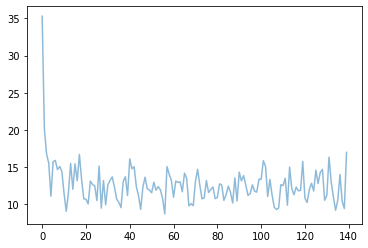

In [22]:
# Ошибка по шагам

plt.plot(np.arange(len(loss_per_iter)), loss_per_iter, "-", alpha=0.5, label="Loss per iter")

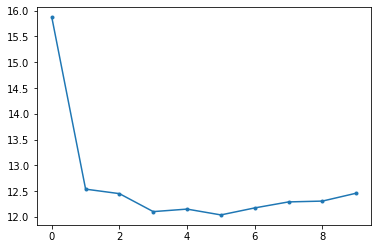

In [23]:
# Ошибка по эпохам

plt.plot(np.arange(len(loss_per_batch)), loss_per_batch, ".-", label="Loss per epoch")

In [24]:
# Проверка на тестовом сете
net.eval()

torch.set_grad_enabled(False)

with torch.no_grad():

  for data_ in testloader:
    inputs, labels = data_
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = net(inputs.float())
    print("Root mean squared error")
    print("Training:", np.sqrt(loss_per_batch[-1]))
    print("Test", np.sqrt(criterion(labels.float(), outputs).detach().cpu().numpy()))
    print('---', '\n')

Root mean squared error
Training: 3.529713707618346
Test 3.6234994
--- 

Root mean squared error
Training: 3.529713707618346
Test 3.8098567
--- 



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([117])) that is different to the input size (torch.Size([117, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [25]:
# Делаем предикт для произвольного куска исходного датасета
# start - исходная пара, answer предсказание
# Совпадений нет
# При запуске на CPU, возможно придется что-то подправить, чтобы тензоры были в нужном месте

df_pred = data[300:350]
input_tensor = torch.tensor(df_pred[features + ['cls']].values).float()
out_tensor = net(input_tensor.cuda(device=device)).cpu()
out = out_tensor.numpy().round()
answer = []
for el in out:
  answer.append(inv_freq_sort_dict[el])
df_pred['answer'] = answer
df_pred[['start', 'answer']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,start,answer
300,утро будет,п
301,день полон,п
302,день приносит,п
303,вы сделаете,п
304,очень беспокойный,п
305,жаловаться особенно,п
306,трудности могут,п
307,первая половина,п
308,будьте внимательны,п
309,вспомните о,п


In [26]:
# torch.save(net.state_dict(), 'simple_model.pth')